# Heart Disease UCI

## Alma Berilo Litric

- The goal of the Project was to classify patients by the presence or abscence of heart disease, as well as to explore the data to see whether it is possible to find any other trends to predict certain cardiovascular events

- Data provided at https://archive.ics.uci.edu/ml/datasets/Heart+Disease

- The database contains 76 attributes, but all published experiments refer to using a subset of 14 of them

- There are 303 instances


## Feature Information:

1. age - age
2. sex - sex
3. cp - chest pain type (4 values)
4. trestbps - resting blood pressure
5. chol - serum cholesterol in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flouroscopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect


## Target Information:

- The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1 (presence)

# Exploratory Data Analysis



- No missing values
- Numerical variables (age, trestbps, chol, thalach, oldpeak, slope, ca) and categorical variables that take numerical values

([<matplotlib.patches.Wedge at 0x20b2885a8d0>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'Disease'),
  Text(0.1534670313650796, -1.0892418786862677, 'No Disease')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.46'),
  Text(0.08370928983549797, -0.5941319338288732, '45.54')])

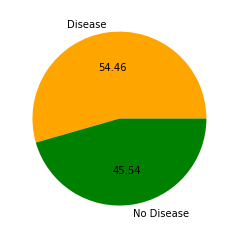

In [4]:
#Target distribution shows that classes are balanced 

plt.pie(df.target.value_counts(), 
        labels = ['Disease', 'No Disease'],
        autopct = '%.2f',
        colors = ['orange', 'green'])

([<matplotlib.patches.Wedge at 0x20b28e14908>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Males'),
  Text(0.5986244427681994, -0.9228481871469777, 'Females')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.32'),
  Text(0.3265224233281087, -0.5033717384438059, '31.68')])

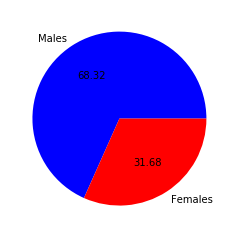

In [5]:
#Sex attribute distribution shows more than two thirds of males in the sample data


plt.pie(df.sex.value_counts(), 
        labels = ['Males', 'Females'],
        autopct = '%.2f',
        colors = ['blue', 'red'])

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

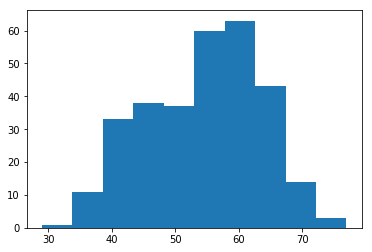

In [6]:
#Age Attribute distribution shows that most of the sample data is within 40 - 65 years range

plt.hist(df.age)

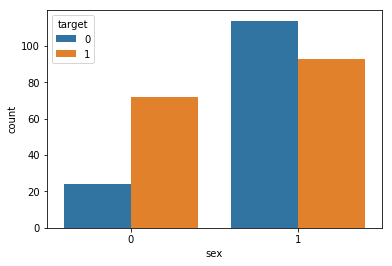

In [7]:
#Sex type and heart disease

#Among females, a great majority of samples are positive for heart disease

#Among males, majority of samples are negative for heart disease

sns.countplot(x = 'sex', data = df, hue = 'target')

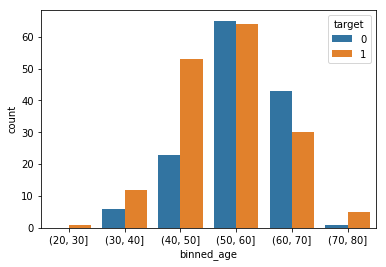

In [8]:
#Age and heart disease

#Ages 50 -70 have more samples without heart disease

#Ages < 50 and ages > 70 have more samples with heart disease

bins = [20,30,40,50,60,70,80]

df['binned_age'] = pd.cut(df['age'], bins)
sns.countplot(x = 'binned_age', data = df, hue = 'target')

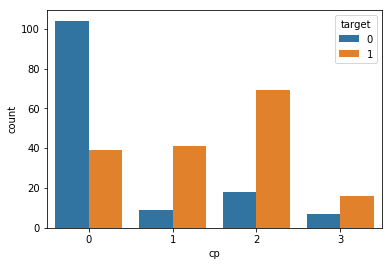

In [9]:
#cp (Chest pain) and heart disease
#chest pain types:0 - typical angina, 1 - atypical angina, 2 - non-angina, 3 - asymptomatic angina

#Most samples with chest pain type 0 do not have heart disease
#Most samples with chest pain type 1, 2 or 3 do have heart disease
#Type 2 is the most common chest pain type among patients diagnosed with heart disease 

sns.countplot(x = 'cp', data = df, hue = 'target')

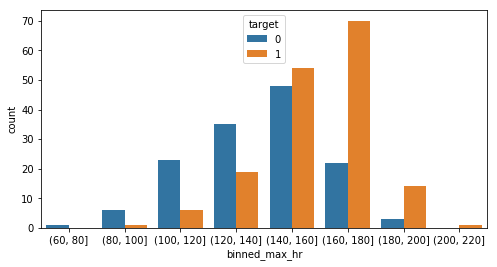

In [10]:
#Maximum heart rate and heart disease

#Patients with maximum heart rate over 140 are more likely to be diagnosed with heart disease
#This is especially true for those whose maximum heart rate is higher than 160
#Further on, the higher the heart rate is, the greater is the probabilty of patient being diagnosed with heart disease

plt.figure(figsize = (8,4))
bins = [60,80,100,120,140,160,180,200,220]

df['binned_max_hr'] = pd.cut(df['thalach'], bins)
sns.countplot(x = 'binned_max_hr', data = df, hue = 'target')


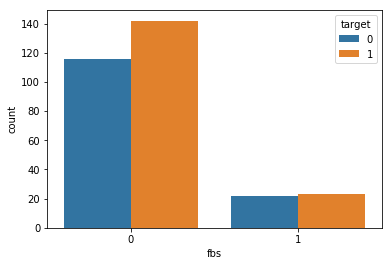

In [11]:
#Fasting blood sugar > 120 mg/dl and heart disease

#Majority of patients do not have fasting blood sugar > 120 mg/dl
#Among the patients whose fbs is greater than 120 mg/dl, approximately 50% are diagnosed with heart disease

sns.countplot(x = 'fbs', data = df, hue = 'target')

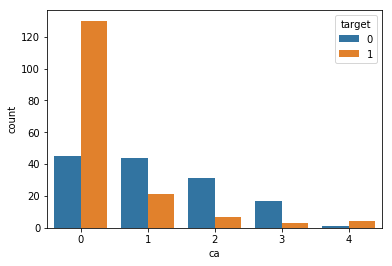

In [12]:
#Ca (number of major vessels (0-3) colored by flouroscopy ) and heart disease

#The smaller the number of major vessels colored by fluoroscopy is, the greater probability of patient being diagnosed with heart disease

sns.countplot(x = 'ca', data = df, hue = 'target')

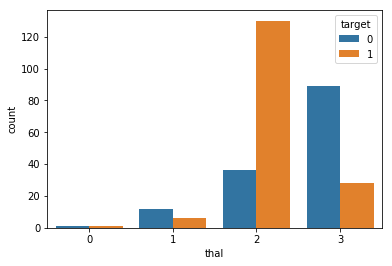

In [16]:
#Thal (defects - 1 - normal; 2 = fixed defect; 3 = reversable defect) and heart disease

#Patients with thal = 2 (fixed defect) are most likely to be diagnosed with heart disease
#Patients with thal = 3(reversable deffect) and thal = 1 (normal) are less likely to be diagnosed with heart disease

sns.countplot(x = 'thal', data = df, hue = 'target')

# Model Implementation and Evaluation

- Categorical features converted into dummy varibles

- Three models implemented: Logistic regression, KNN, Random forest
- Evaluation based on classification report, confusion matrix, ROC curve and AUC score 


# Logistic Regression - Model Evaluation

In [27]:
#Logistic Regression Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

   micro avg       0.80      0.80      0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [28]:
#LR Confusion Matrix

print(confusion_matrix(y_test, y_pred))

[[19  9]
 [ 3 30]]


## FP = 7, TN = 21, FN = 3, TP = 30
## - Out of 28 instances with class 0, the classifier predicted correctly 21
## - Out of 33 instances with class 1, the classifier predicted correctly 30
## - Accuracy score: 0.8360655737704918

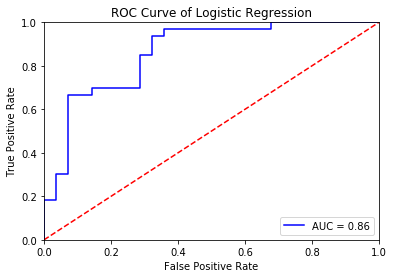

In [34]:
probs = lr.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

# K-Nearest Neighbors - Model Evaluation

In [57]:
#KNN Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        28
           1       0.68      0.70      0.69        33

   micro avg       0.66      0.66      0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.65      0.66      0.66        61



In [58]:
#KNN Confusion Matrix

print(confusion_matrix(y_test, y_pred))

[[17 11]
 [10 23]]


## FP = 11, TN = 17, FN = 10, TP = 23
## - Out of 28 instances with class 0, the classifier predicted correctly 17
## - Out of 33 instances with class 1, the classifier predicted correctly 23
## - Accuracy score: 0.6557377049180327

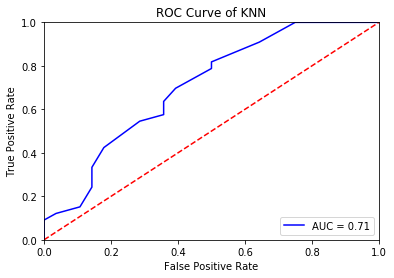

In [62]:
#ROC Curve for KNN

probs = knn.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

# Random Forest - Model Evaluation

In [42]:
#RF Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

   micro avg       0.79      0.79      0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [43]:
#RF Confusion Matrix

print(confusion_matrix(y_test, y_pred))

[[18 10]
 [ 3 30]]


## FP = 11, TN = 17, FN = 2, TP = 31
## - Out of 28 instances with class 0, the classifier predicted correctly 17
## - Out of 33 instances with class 1, the classifier predicted correctly 31

## - Out of 33 sick persons, the classifier correctly identified 31 (False Negative = 2, i.e. 2 sick persons were misdiagnosed) - the lowest FN so far

## - Accuracy score: 0.7868852459016393

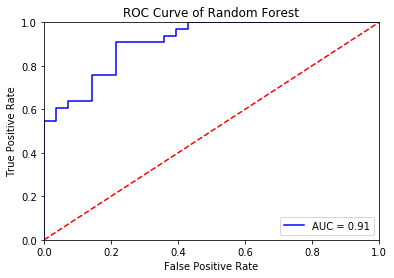

In [46]:
#RF ROC Curve

probs = random_forest.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

# Conclusion


- Looking at all metrics, it is obvious that KNN model has very poor performance compared to other two models and in general, so the choice will be made between Logistic Regression and Random Forest models


- LR model has accuracy score of 0.8360655737704918, which is better than RF accuracy score of 0.7868852459016393


- However, as we are using a health dataset, and there is a high cost associated with False Negative (people with heart desease with the wrong diagnosis and consequently no treatment), the metric of choice for evaluating models will be recall 


- Logistic Regression Recall - 0.909, Random Forest Recall - 0.939


- Considering recall, Random Forest performance looks better, which makes it the model of choice in this classification problem


- The selected Random Forest Model has recall 0.939, accuracy score 0.7868852459016393, and AUC score 0.91 
 